In [50]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import os
import sys 
from torch.nn import functional as F
import configparser
import pandas as pd 

import numpy as np
import torch
import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
from os.path import join as oj
sys.path.insert(0, "../src")
from unet import UNet
import my_data
import pickle as pkl
pd.set_option('display.float_format', lambda x: '%.3f' % x)
cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if cuda else "cpu")
config = configparser.ConfigParser()
config.read('../config.ini');
data_path =config['DATASET']['data_path'] 
fig_path =config['PATHS']['figure_path'] 


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [56]:
from os.path import join as oj
from skimage import io
im = io.imread(oj(data_path, 'voltif_LNO','LNO_subsample_500-700.tif'))

In [57]:
im.shape

(200, 2048, 2048)

In [58]:
from scipy.signal import correlate2d

In [59]:
im = np.asarray(im).astype(np.float32)

In [77]:
im.shape

(200, 2048, 2048)

In [78]:
im = im[:, 500:700, 500:700]

In [20]:
im = im [:, 1000:1200, 1000:1200]

In [33]:
im = im [:, 100:300, 100:300]

In [34]:
im -= im.mean()
im /= im.std()

In [35]:
correlations = []
test_img = im[100].reshape(-1)

from tqdm.notebook import tqdm
for i in tqdm(range(1, 199)):
    correlations.append(np.cov(test_img, im[i].reshape(-1)).mean())



  0%|          | 0/198 [00:00<?, ?it/s]

In [ ]:
correlations_2 = []
test_img = im[:,100].reshape(-1)

from tqdm.notebook import tqdm
for i in tqdm(range(1, 199)):
    correlations_2.append(np.cov(test_img, im[:,i].reshape(-1)).mean())



  0%|          | 0/198 [00:00<?, ?it/s]

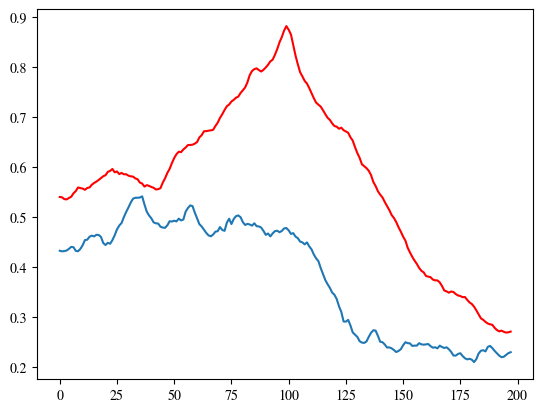

In [38]:
plt.plot(correlations)
plt.plot(correlations_2, c= 'r')